In [1]:
import sympy as sym
from IPython.display import display
from IPython.core.display import Math
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x
from matplotlib.patches import Polygon
import sympy.plotting.plot as symplot
import scipy as sp
from scipy.signal import find_peaks
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
sym.init_printing()

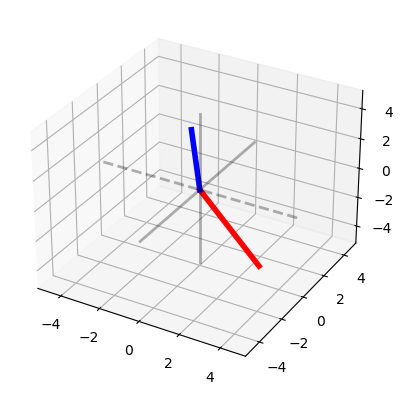

In [2]:
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')
ar1 = np.array([3, 0, -4])
ar2 = np.array([-1, 1, 3])
ax.plot([0, ar1[0]], [0, ar1[1]], [0, ar1[2]], ('r'), linewidth=4)
ax.plot([0, ar2[0]], [0, ar2[1]], [0, ar2[2]], ('b'), linewidth=4)

ax.plot([-5, 5], [0, 0], [0, 0], ('k--'), linewidth=2, alpha=0.3)
ax.plot([0, 0], [-5, 5], [0, 0], ('k'), linewidth=2, alpha=0.3)
ax.plot([0, 0], [0, 0], [-5, 5], ('k'), linewidth=2, alpha=0.3)

ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
plt.show()

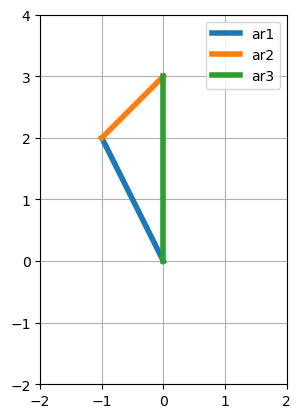

In [3]:
ar1 = np.array([-1, 2])
ar2 = np.array([1, 1])
ar3 = ar1 + ar2

plt.plot([0, ar1[0]], [0, ar1[1]], label='ar1', linewidth=4)
plt.plot([0-1, ar2[0]-1], [0, ar2[1]]+ar1[1], label='ar2', linewidth=4)
plt.plot([0, ar3[0]], [0, ar3[1]], label='ar3', linewidth=4)

plt.grid()
plt.axis('square')
plt.axis([-2, 2, -2, 4])
plt.legend()
plt.show()

In [4]:
v1 = np.linspace(10, 20, 100)
v2 = np.linspace(20, 30, 10)
try:
    dot = np.dot(v1, v2)
    print(dot)
except ValueError:
    print('try same size')

try same size


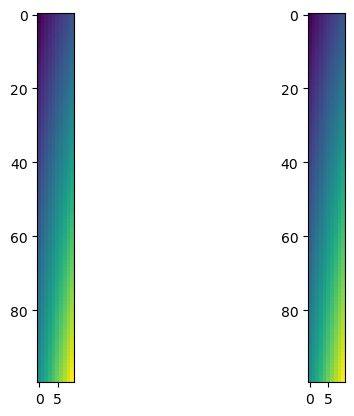

In [5]:
v1 = np.linspace(10, 20, 100)
v2 = np.linspace(20, 30, 10)

out1 = np.outer(v1, v2)
out2 = np.outer(v2, v1).T

plt.subplot(121)
plt.imshow(out1)
plt.subplot(122)
plt.imshow(out2)

In [6]:
def matMulMain(v1, v2):
    # try:
    #     matmulres = np.zeros([szv1, szv2[1]])
    #     for rowi in range(0, szv1):
    #         for coli in range(0, szv2[1]):
    #             matmulres[rowi, coli] = np.sum(np.dot(v1[rowi], v2[coli]))
    #     print(matmulres)
    # except ValueError:
    #     print('wrong sizes')
    szv1 = np.shape(v1)
    szv2 = np.shape(v2)
    matmulres = np.zeros((szv1[0], szv2[1]))
    for rowi in range(szv1[0]):
        for coli in range(szv2[1]):
            matmulres[rowi, coli] = np.dot(v1[rowi, :], v2[:, coli])
    print(matmulres)

    print(v1@v2)
    print(v1@v2 - matmulres)


matMulMain(np.random.randn(2, 3), np.random.randn(3, 4))

[[ 1.30475308  3.1681873  -2.94504167 -0.05677494]
 [-0.12450695 -1.74537856 -0.79561683  0.28425902]]
[[ 1.30475308  3.1681873  -2.94504167 -0.05677494]
 [-0.12450695 -1.74537856 -0.79561683  0.28425902]]
[[-2.22044605e-16  0.00000000e+00 -4.44089210e-16  0.00000000e+00]
 [ 2.77555756e-17 -2.22044605e-16 -1.11022302e-16  0.00000000e+00]]


In [7]:
matr1 = np.random.randn(3, 10)

x = matr1@matr1.T
x

array([[14.75474726, -4.14197352, 10.97530582],
       [-4.14197352, 14.57912694, -5.11095359],
       [10.97530582, -5.11095359, 14.93969372]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


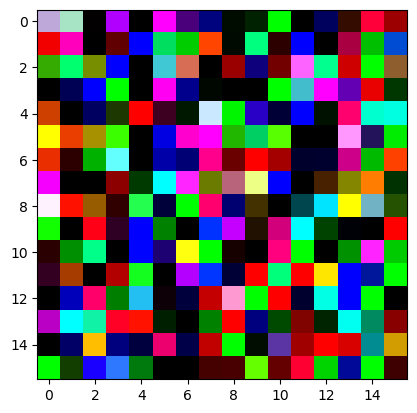

In [8]:
x = np.random.randn(16, 16, 3)
plt.imshow(x)

int64
float64
[[ 0.          0.          1.59379946  2.61018542]
 [ 0.         -0.59305421  0.39164051 -2.00038024]
 [ 0.         -0.19768474 -3.05705209 -2.55875565]
 [-0.2222068  -0.88193985  3.81618898  2.75884014]]


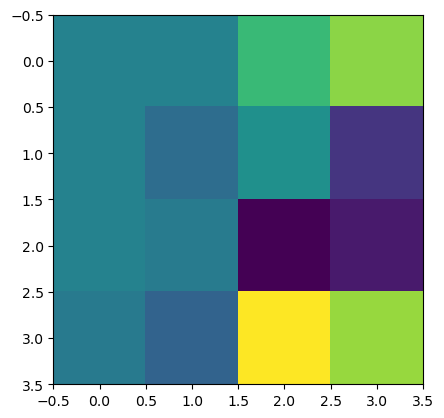

In [9]:
from scipy.__config__ import show


m = 4
n = 4
ranmatr = np.random.rand(m, n)
matr1 = np.int64(ranmatr * (4 + 4) - 4)
matr2 = np.eye(4, 4)
matr3 = np.triu(np.random.randn(4, 4))
matr12 = matr1@matr2
matr13 = matr1@matr3
plt.imshow(matr1)
plt.imshow(matr12)
plt.imshow(matr13)
print(matr1.dtype)
print(matr12.dtype)
print(matr13)
plt.show()

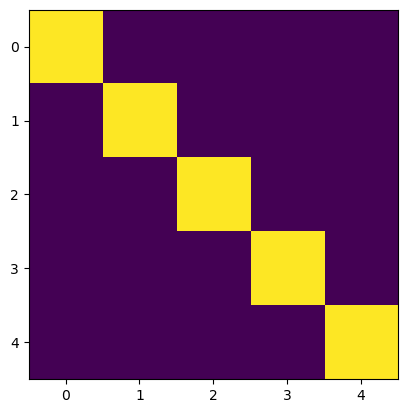

In [10]:
matr = np.random.randint(-5, 5, (5, 6))
matr[:, 0] = matr[:, 1]
matr2 = np.random.randn(5, 7)
matrps = np.linalg.pinv(matr)
matrps2 = np.linalg.pinv(matr2)

# plt.imshow(matr@matrps)
# plt.imshow(matr2@matrps2)
plt.imshow(matr2@matrps2)

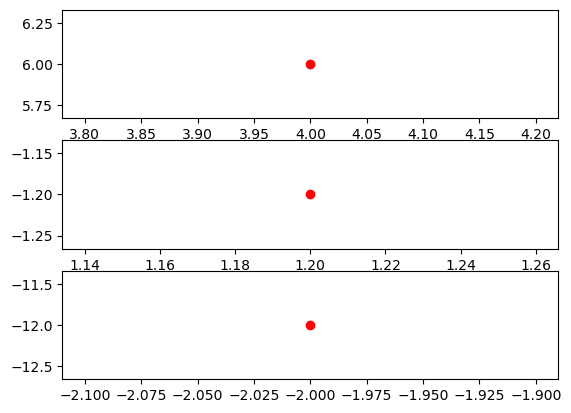

In [30]:
X1 = np.array([[3, -1], [-1, 1]])
y1 = np.array([6, 2])
b1 = np.linalg.solve(X1, y1)

X2 = np.array([[3, -2], [2, -.5]])
y2 = np.array([6, 3])
b2 = np.linalg.solve(X2, y2)

X3 = np.array([[3, -1], [2, -.5]])
y3 = np.array([6, 2])
b3 = np.linalg.solve(X3, y3)

fig, ax = plt.subplots(3, 1)
ax[0].plot(b1[0], b1[1], 'ro')
ax[1].plot(b2[0], b2[1], 'ro')
ax[2].plot(b3[0], b3[1], 'ro')
plt.show()

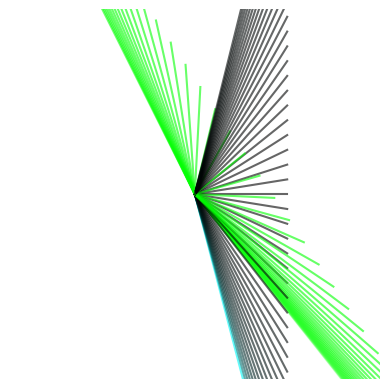

In [64]:
a = np.linspace(-4, 4, 51)
M = np.array([[1.5, -1], [-1, 1.5]])
for ai in range(1, len(a)):
    Mv = M@np.array([1, a[ai]])
    plt.plot([0, Mv[0]], [0, Mv[1]], color=[
             abs(a[ai]/(4*ai)), 1, abs(a[ai]/(4*ai))], alpha=0.6)
    plt.plot([0, np.array([1, a[ai]])[0]], [0, np.array([1, a[ai]])[1]], color=[
             0, abs(a[ai]/(4*ai)), abs(a[ai]/(4*ai))], alpha=0.6)

plt.axis('square')
plt.axis([-2, 2, -2, 2])
plt.axis('off')
plt.show()

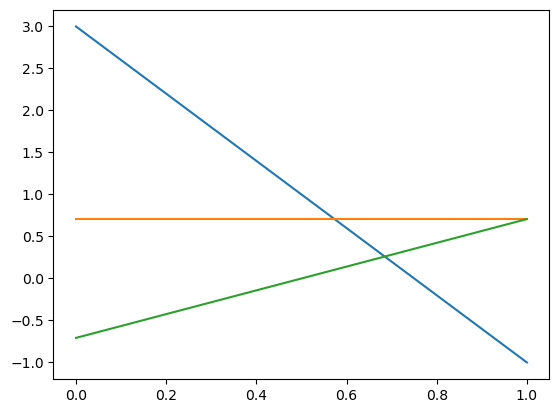

In [94]:
M = np.array([[1, 2], [2, 1]])
eigvals, eigvecs = np.linalg.eig(M)
plt.plot(eigvals)
plt.plot(eigvecs)
plt.show()

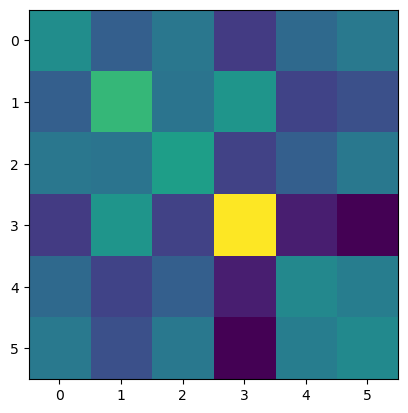

In [92]:
matr = np.random.randn(6, 6)
matr = matr@matr.T
eigvals, eigvecs = np.linalg.eig(matr)



plt.imshow(matr)

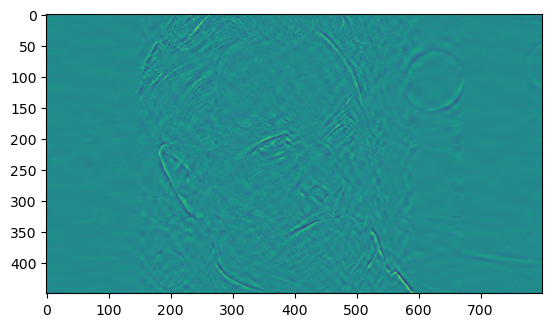

In [28]:
elon = Image.open('photos/elon.jpeg')
elon = np.mean(elon, 2)
U, s, V = np.linalg.svd(elon)


S = np.zeros(np.shape(elon))
for i in range(10, len(s)):
    S[i, i] = s[i]
elon2 = U@S@V
plt.imshow(elon2)